In [95]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# official final rankings in D3 National Championships
final_rankings = [
    "MIT", "U. of Chicago", "Williams", "NYU", "Johns Hopkins", "Colorado College", "Emory", "Washington and Lee", "SUNY Geneseo", "Washington U.", "Claremont-Mudd-Scripps", "RPI", "Wis.-La Crosse", "Amherst", "Calvin", "Tufts", "St. Olaf", "Carleton", "UC Santa Cruz", "Vassar", "George Fox", "Middlebury", "Connecticut College", "Wesleyan", "Carnegie Mellon", "Wartburg", "Lynchburg", "Trine", "DePauw", "Pomona-Pitzer", "Coast Guard", "Rowan"
]
# given two lists of rankings, find the mean squared error of their positions 
def compare_lists(list1, list2):
    schools = set(list1 + list2)
    se = []
    for school in schools:
        if school in list1 and school in list2:
            se.append((list1.index(school) - list2.index(school)) ** 2)
    return np.sqrt(sum(se)) / len(schools)


In [97]:
adj = pd.read_csv("./running_all_d3_diff.csv", header=0)
labels = adj.columns.tolist()
A = adj.values

In [98]:
L = pd.read_csv("./running_all_d3_diff.csv", header=0)
L = L.to_numpy()

In [99]:
G = nx.DiGraph()
for i, u in enumerate(labels):
    for j, v in enumerate(labels):
        w = A[i, j]
        if w != 0:
            G.add_edge(u, v, weight=w)

In [100]:
def springRank(G, nodelist, alpha=0.1):

    A = nx.to_numpy_array(G, nodelist=nodelist, weight='weight')

    k_in = np.sum(A, axis=0)
    # k_in = np.zeros(len(A))

    # for i in range(A.shape[0]):
    #     total = 0
    #     for j in range(len(A[i])): 
    #         total += A[j][i] 
    #     k_in[i] = total
        



    k_out = np.sum(A, axis=1)
    # k_out = np.zeros(len(A))
    # for i in range(A.shape[0]):
    #     total = 0
    #     for j in range(len(A[i])): 
    #         total += A[i][j]
    #     k_out[i] = total


    new_sub = np.zeros(len(A))
    for i in range(len(A)):
        for j in range(len(A[i])):
            new_sub[i] += L[j][i]*(A[j][i] - A[i][j])
            # new_sub[i] += (A[j][i] - A[i][j])
    

    Kin = np.diag(k_in)
    Kout = np.diag(k_out)


    sub = k_in - k_out

    M = Kout + Kin - (A + A.T) + alpha * np.identity(len(nodelist))
    b = (new_sub)

    s = np.linalg.solve(M, b)

    return dict(zip(nodelist, s))

In [101]:
alpha = 0.1
raw_scores = springRank(G, labels, alpha)
scores = np.array([ raw_scores[node] for node in labels ])
scores_norm = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)


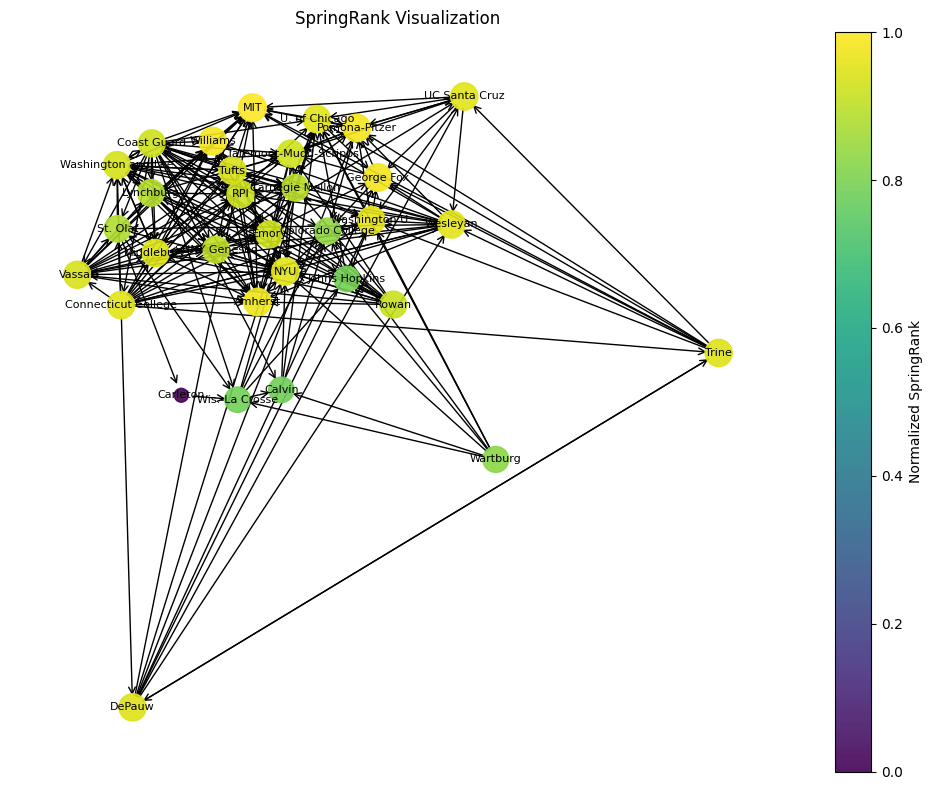

In [102]:
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G, scale=2)
nodes = nx.draw_networkx_nodes(
    G, 
    pos,
    nodelist=labels,
    node_color=scores_norm,
    cmap=plt.cm.viridis,
    node_size=100 + 300 * scores_norm,
    alpha=0.9
)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=12, width=1)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label="Normalized SpringRank")
plt.title("SpringRank Visualization", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

In [106]:
pr = dict(zip(labels, scores_norm))

sorted_list = sorted(pr.items(), key=lambda x: x[1], reverse=True)
#   # get the ordered list

print("Ranked Schools:")

for i, (school, score) in enumerate(sorted_list, start=1):
    print(f"{i}. {school} - {score:.4f}")


Ranked Schools:
1. MIT - 1.0000
2. Williams - 0.9881
3. George Fox - 0.9832
4. Pomona-Pitzer - 0.9826
5. Amherst - 0.9743
6. Washington U. - 0.9648
7. Connecticut College - 0.9570
8. NYU - 0.9564
9. UC Santa Cruz - 0.9544
10. Wesleyan - 0.9538
11. U. of Chicago - 0.9536
12. DePauw - 0.9526
13. Trine - 0.9496
14. Middlebury - 0.9466
15. Tufts - 0.9430
16. Vassar - 0.9390
17. Washington and Lee - 0.9364
18. Claremont-Mudd-Scripps - 0.9292
19. Emory - 0.9261
20. RPI - 0.9252
21. Coast Guard - 0.9224
22. Rowan - 0.9165
23. SUNY Geneseo - 0.9043
24. Carnegie Mellon - 0.8981
25. Lynchburg - 0.8903
26. St. Olaf - 0.8790
27. Colorado College - 0.8394
28. Wartburg - 0.8258
29. Johns Hopkins - 0.7918
30. Wis.-La Crosse - 0.7853
31. Calvin - 0.7830
32. Carleton - 0.0000


In [ ]:
ordered = []

for i in range(len(final_rankings)):
    ordered.append(sorted_list[i][0])
    


#print("Ranked Schools:")
for i in range(len(ordered)):
    print(f"{i+1}. {labels[ordered[i]]} - {sorted_list[i][1]:.4f}")
ranked = [labels[ordered[i]] for i in range(len(ordered))]
ordered
#print(final_rankings)

['MIT',
 'Williams',
 'George Fox',
 'Pomona-Pitzer',
 'Amherst',
 'Washington U.',
 'Connecticut College',
 'NYU',
 'UC Santa Cruz',
 'Wesleyan',
 'U. of Chicago',
 'DePauw',
 'Trine',
 'Middlebury',
 'Tufts',
 'Vassar',
 'Washington and Lee',
 'Claremont-Mudd-Scripps',
 'Emory',
 'RPI',
 'Coast Guard',
 'Rowan',
 'SUNY Geneseo',
 'Carnegie Mellon',
 'Lynchburg',
 'St. Olaf',
 'Colorado College',
 'Wartburg',
 'Johns Hopkins',
 'Wis.-La Crosse',
 'Calvin',
 'Carleton']

In [114]:
compare_lists(final_rankings, ordered)



2.1928505991061042